In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvMoSa

In [2]:

image_org = cv2.imread('input/puma.jpg')
image_dice = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY)
image_Blur = cv2.medianBlur(image_dice, 7)
_, image_thresh = cv2.threshold(image_Blur, 180, 255, cv2.THRESH_BINARY)
contours, hierarch = cv2.findContours(image_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2 Area: 21256.5
points length: 21282
cvMoSa area: 21282
accuracy: 99.8800366946581 %


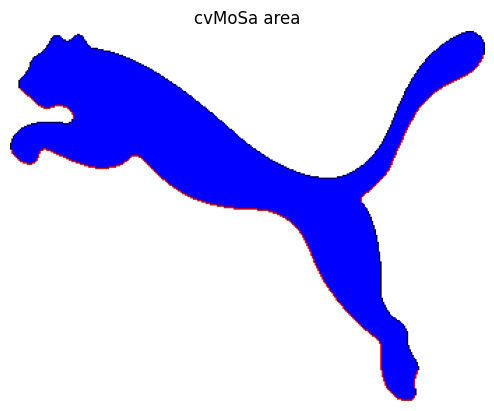

In [4]:
n = 9
contourM = contours[n]

x, y, w, h = cvMoSa.boundingRectMoSa(contours[n])
contourM_ = contourM[:,0].tolist()

area, points = cvMoSa.contourAreaMoSa(contourM)
image = np.ones((h,w,3),dtype= np.uint8)*255
contourM = contourM[:,0]
for con in contourM:
    image[con[1]-y,con[0]-x,1:3] = 0
for con in points:
    image[con[1]-y,con[0]-x,0:2] = 0

cv2Area = cv2.contourArea(contourM)
print('cv2 Area:',cv2Area)
print('points length:',len(points))
print('cvMoSa area:',area)
print('accuracy:',(1 - abs(cv2Area - area)/cv2Area)*100,'%')
plt.imshow(image)
plt.title('cvMoSa area')
plt.axis('off')
plt.show()